Neste notebook são feitas as primeiras análises exploratórias sobre criminologia na cidade de San Francisco - Califórnia

Dados tirados do Kaggle: https://www.kaggle.com/c/sf-crime/data

In [1]:
%pip freeze > requirements.txt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


Colocando os dados no data frame e visualizando os dados.

In [2]:
dadosCrime2 = pd.read_csv("train.csv")
# .shape exibe o tamanho da tabela (linhas e colunas)
print('Tamanho:',dadosCrime2.shape)
dadosCrime2.head(10)

Tamanho: (878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [3]:
#retirei as colunas X e Y porque não irão ser usadas por enquanto
dadosCrime2 = dadosCrime2.drop(columns = ['X'])
dadosCrime2 = dadosCrime2.drop(columns = ['Y'])
dadosCrime2.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST


In [4]:
#mostra a quantidade total de linhas
dadosCrime2.index

RangeIndex(start=0, stop=878049, step=1)

In [5]:
# observando os tipos de dados que tenho
dadosCrime2.values

array([['2015-05-13 23:53:00', 'WARRANTS', 'WARRANT ARREST', ...,
        'NORTHERN', 'ARREST, BOOKED', 'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:53:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:33:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'VANNESS AV / GREENWICH ST'],
       ...,
       ['2003-01-06 00:01:00', 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 'SOUTHERN', 'NONE',
        '5TH ST / FOLSOM ST'],
       ['2003-01-06 00:01:00', 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 'SOUTHERN',
        'NONE', 'TOWNSEND ST / 2ND ST'],
       ['2003-01-06 00:01:00', 'FORGERY/COUNTERFEITING',
        'CHECKS, FORGERY (FELONY)', ..., 'BAYVIEW', 'NONE',
        '1800 Block of NEWCOMB AV']], dtype=object)

In [6]:
#total de valores não repetidos
dadosCrime2.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
dtype: int64

In [13]:
#Tipos de crime que mais ocorrem em ordem descrescente por quantidades
dadosCrime2.groupby(['Category']).Category.count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

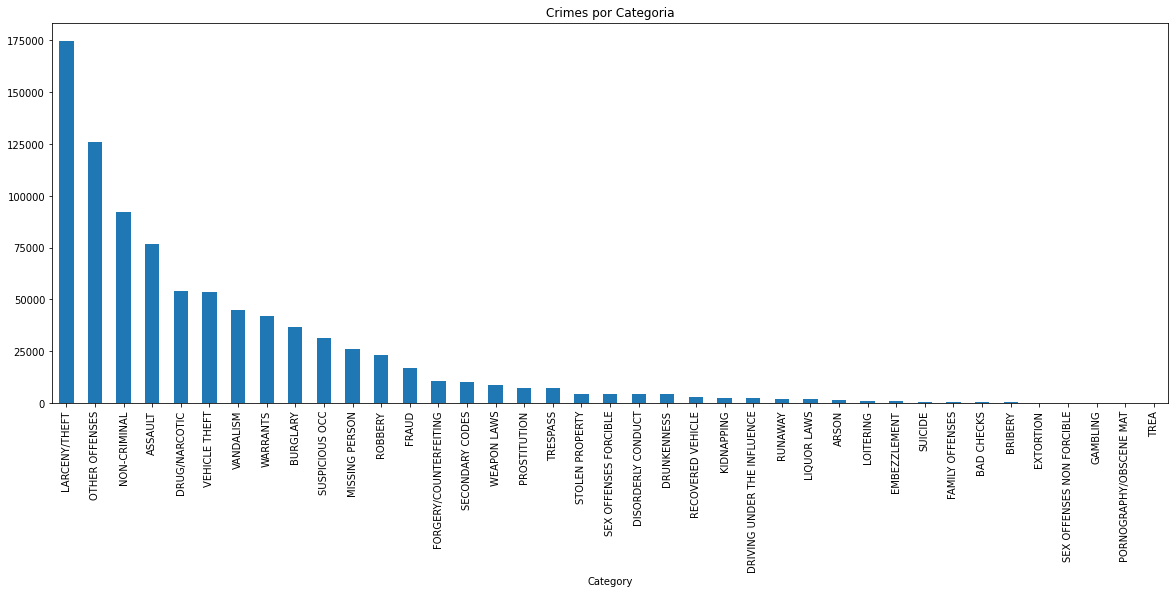

In [14]:
#melhorei o gráfico fiz a contagem usando groupby, coloquei em ordem decrescente
plt.title('Crimes por Categoria')
dadosCrime2.groupby(['Category']).Category.count().sort_values(ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

In [9]:
#Dias da semana que mais acontecem crimes
dadosCrime2.groupby('DayOfWeek').count()

,Dates,Category,Descript,PdDistrict,Resolution,Address
DayOfWeek,,,,,,
Friday,133734,133734,133734,133734,133734,133734
Monday,121584,121584,121584,121584,121584,121584
Saturday,126810,126810,126810,126810,126810,126810
Sunday,116707,116707,116707,116707,116707,116707
Thursday,125038,125038,125038,125038,125038,125038
Tuesday,124965,124965,124965,124965,124965,124965
Wednesday,129211,129211,129211,129211,129211,129211


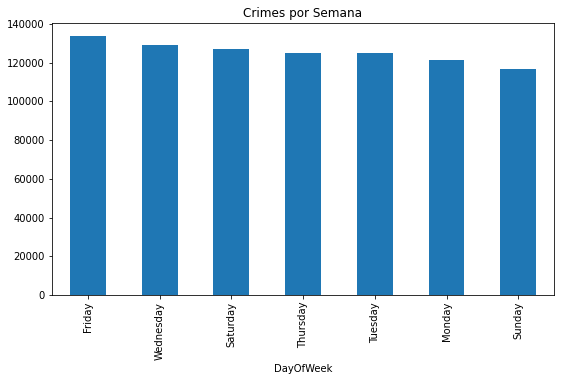

In [31]:
#gráfico por semana
plt.title('Crimes por Semana')
dadosCrime2.groupby(['DayOfWeek']).DayOfWeek.count().sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.show()

In [22]:
#Total de crimes por Distrito
dadosCrime2.groupby('PdDistrict').count().sort_values(by=[('PdDistrict')],ascending=True)

,Dates,Category,Descript,DayOfWeek,Resolution,Address
PdDistrict,,,,,,
BAYVIEW,89431,89431,89431,89431,89431,89431
CENTRAL,85460,85460,85460,85460,85460,85460
INGLESIDE,78845,78845,78845,78845,78845,78845
MISSION,119908,119908,119908,119908,119908,119908
NORTHERN,105296,105296,105296,105296,105296,105296
PARK,49313,49313,49313,49313,49313,49313
RICHMOND,45209,45209,45209,45209,45209,45209
SOUTHERN,157182,157182,157182,157182,157182,157182
TARAVAL,65596,65596,65596,65596,65596,65596


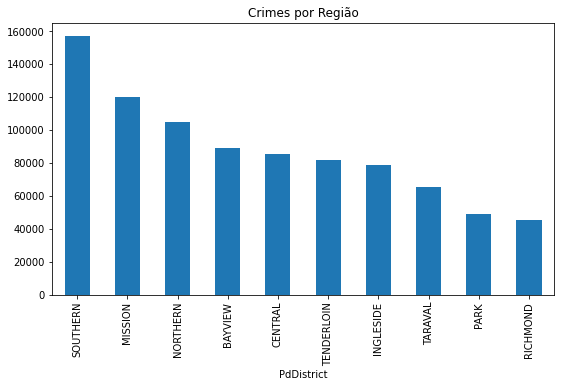

In [32]:
#gráfico por Distrito
plt.title('Crimes por Região')
dadosCrime2.groupby(['PdDistrict']).PdDistrict.count().sort_values(ascending=False).plot(kind='bar',figsize=(9,5))
plt.show()

In [12]:
#resolução dos crimes
dadosCrime2.groupby('Resolution').count()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address
Resolution,,,,,,
"ARREST, BOOKED",206403,206403,206403,206403,206403,206403
"ARREST, CITED",77004,77004,77004,77004,77004,77004
CLEARED-CONTACT JUVENILE FOR MORE INFO,217,217,217,217,217,217
COMPLAINANT REFUSES TO PROSECUTE,3976,3976,3976,3976,3976,3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934,3934,3934,3934,3934,3934
EXCEPTIONAL CLEARANCE,1530,1530,1530,1530,1530,1530
JUVENILE ADMONISHED,1455,1455,1455,1455,1455,1455
JUVENILE BOOKED,5564,5564,5564,5564,5564,5564
JUVENILE CITED,3332,3332,3332,3332,3332,3332


In [24]:
#endereços que mais acontece crimes e quais crimes ocorrem
dadosCrime2.groupby(['Address','PdDistrict','Category']).Address.count().sort_values(ascending=False).head(20)

Address                   PdDistrict  Category      
800 Block of BRYANT ST    SOUTHERN    LARCENY/THEFT     6144
                                      NON-CRIMINAL      5583
800 Block of MARKET ST    SOUTHERN    LARCENY/THEFT     3256
800 Block of BRYANT ST    SOUTHERN    OTHER OFFENSES    3019
                                      ASSAULT           1926
2000 Block of MISSION ST  MISSION     DRUG/NARCOTIC     1866
800 Block of BRYANT ST    SOUTHERN    WARRANTS          1719
1400 Block of PHELPS ST   BAYVIEW     MISSING PERSON    1468
2000 Block of MISSION ST  MISSION     OTHER OFFENSES    1202
800 Block of BRYANT ST    SOUTHERN    VANDALISM         1155
                                      SUSPICIOUS OCC    1153
100 Block of OFARRELL ST  TENDERLOIN  LARCENY/THEFT     1098
0 Block of TURK ST        TENDERLOIN  DRUG/NARCOTIC     1088
3200 Block of 20TH AV     TARAVAL     LARCENY/THEFT     1015
800 Block of BRYANT ST    SOUTHERN    FRAUD              942
700 Block of MARKET ST    SOUTHE